In [1]:
#설정
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#계산그래프를 만들어 실행하기
import tensorflow as tf

reset_graph()

x = tf.Variable(3, name="x") #변수 선언
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [4]:
#평가(실행)하기
sess = tf.Session() #세션 실행
sess.run(x.initializer) #변수 정의
sess.run(y.initializer)
result = sess.run(f) #평가(실행)
print(result)

42


In [5]:
#세션 종료
sess.close()

In [6]:
#with로 세션 선언하기
with tf.Session() as sess:
    x.initializer.run() #변수 초기화 단계
    y.initializer.run()
    result = f.eval() #with 블록이 끝나면 자동으로 세션 종료

In [7]:
result

42

In [8]:
#계산 그래프가 실행될 때 모든 변수를 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()

In [9]:
result

42

In [10]:
##계산 그래프 관리
reset_graph()

x1 = tf.Variable(1) #변수를 선언하면 자동으로 기본 그래프에 추가된다.
x1.graph is tf.get_default_graph()

True

In [11]:
#독립적인 그래프 생성하여 노드 추가하기
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is graph

True

In [12]:
#기본 그래프는 아니다
x2.graph is tf.get_default_graph()

False

In [13]:
#연관된 다른 노드들에 대한 평가를 자동으로 진행한다.
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  
    print(z.eval())  # x,y를 두번 평가

10
15


In [14]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z]) #x,y를 한번만 평가
    print(y_val)  # 10
    print(z_val)  # 15

10
15


In [15]:
#tensor flow를 이용한 선형회귀(정규방정식 이용)
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X") #데이터 정의
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y) #그래프 정의(정규방정식)

with tf.Session() as sess:
    theta_value = theta.eval()

In [16]:
theta_value

array([[-3.72048187e+01],
       [ 4.36271667e-01],
       [ 9.38740931e-03],
       [-1.07066855e-01],
       [ 6.44966364e-01],
       [-4.11580004e-06],
       [-3.77993658e-03],
       [-4.23913479e-01],
       [-4.37445879e-01]], dtype=float32)

In [17]:
#numpy와 비교
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [18]:
#scikt learn과 비교
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [19]:
##tensor flow를 이용한 선형회귀(경사하강법)
#스케일 조정(scikit learn을 이용)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data] #베타0 추가

In [20]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [21]:
#수동으로 계산하기
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X") #노드 정의
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta") #난수 발생 노드 정의
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients) #그래프 정의

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init) #모든 변수 초기화

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("에포크", epoch, "MSE =", mse.eval())
        sess.run(training_op) #평가
    
    best_theta = theta.eval()

에포크 0 MSE = 9.161543
에포크 100 MSE = 0.7145006
에포크 200 MSE = 0.56670463
에포크 300 MSE = 0.5555716
에포크 400 MSE = 0.5488116
에포크 500 MSE = 0.5436362
에포크 600 MSE = 0.53962916
에포크 700 MSE = 0.5365092
에포크 800 MSE = 0.53406775
에포크 900 MSE = 0.53214705


In [22]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770885],
       [ 0.3617837 ],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614528 ],
       [-0.63752776]], dtype=float32)

In [23]:
#자동미분 사용하기
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = tf.gradients(mse, [theta])[0] #자동 미분 함수
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("에포크", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("best_theta:")
print(best_theta)

에포크 0 MSE = 9.161543
에포크 100 MSE = 0.7145006
에포크 200 MSE = 0.56670463
에포크 300 MSE = 0.5555716
에포크 400 MSE = 0.5488117
에포크 500 MSE = 0.5436362
에포크 600 MSE = 0.53962916
에포크 700 MSE = 0.53650916
에포크 800 MSE = 0.5340678
에포크 900 MSE = 0.53214717
best_theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [24]:
#tensor flow를 이용한 선형회귀(GradientDescentOptimizer 이용)
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("에포크", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("best_theta:")
print(best_theta)

에포크 0 MSE = 9.161543
에포크 100 MSE = 0.7145006
에포크 200 MSE = 0.56670463
에포크 300 MSE = 0.5555716
에포크 400 MSE = 0.5488117
에포크 500 MSE = 0.5436362
에포크 600 MSE = 0.53962916
에포크 700 MSE = 0.53650916
에포크 800 MSE = 0.5340678
에포크 900 MSE = 0.53214717
best_theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [25]:
#tensor flow를 이용한 선형회귀(모멘텀 옵티마이저 이용)
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("best_theta:")
print(best_theta)

best_theta:
[[ 2.068558  ]
 [ 0.8296286 ]
 [ 0.11875337]
 [-0.26554456]
 [ 0.3057109 ]
 [-0.00450251]
 [-0.03932662]
 [-0.89986444]
 [-0.87052065]]


In [26]:
#PlaceHolder
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3)) #placeholder(각각의 미니배치가 위치함)
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)

[[6. 7. 8.]]


In [27]:
print(B_val_2) 

[[ 9. 10. 11.]
 [12. 13. 14.]]


In [28]:
##미니배치 경사하강법
#구성
learning_rate = 0.01

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X") #placeholder로 정의
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [29]:
#미니배치만들기
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))


def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

In [30]:
#그래프 수행하기
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size) #X,Y값 전달
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval() #x,y에 의존하지 않음으로 placeholer로 전달 받을 필요가 없다.

In [31]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

In [32]:
#모델의 저장
reset_graph()

n_epochs = 1000                                                                       # 책에는 없습니다.
learning_rate = 0.01                                                                  # 책에는 없습니다.

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # 책에는 없습니다.
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # 책에는 없습니다.
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # 책에는 없습니다.
error = y_pred - y                                                                    # 책에는 없습니다.
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # 책에는 없습니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # 책에는 없습니다.
training_op = optimizer.minimize(mse)                                                 # 책에는 없습니다.

init = tf.global_variables_initializer()
saver = tf.train.Saver() #저장 노드 생성

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("에포크", epoch, "MSE =", mse.eval())                                # 책에는 없습니다.
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

에포크 0 MSE = 9.161543
에포크 100 MSE = 0.7145006
에포크 200 MSE = 0.56670463
에포크 300 MSE = 0.5555716
에포크 400 MSE = 0.5488117
에포크 500 MSE = 0.5436362
에포크 600 MSE = 0.53962916
에포크 700 MSE = 0.53650916
에포크 800 MSE = 0.5340678
에포크 900 MSE = 0.53214717


In [33]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614528 ],
       [-0.6375277 ]], dtype=float32)

In [34]:
#모델의 복원
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval() # 책에는 없습니다.

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [35]:
#복원된 데이터가 같은지 확인
np.allclose(best_theta, best_theta_restored)

True

In [36]:
#theta를 "weights"와 같은 다른 이름으로 저장하고 복원하는 Saver 객체를 원할 경우
saver = tf.train.Saver({"weights": theta})

In [37]:
#그래프 구조 자체를 복원
reset_graph()
# 빈 그래프로 시작합니다

saver = tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")  # 그래프 구조를 로드합니다.
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # 책에는 없습니다.

with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # 그래프 상태를 로드합니다.
    best_theta_restored = theta.eval() # 책에는 없습니다.

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [38]:
#복원 확인
np.allclose(best_theta, best_theta_restored)

True

In [39]:
#jupyter notebook에서 시각화
# TensorFlow Graph visualizer code
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [40]:
show_graph(tf.get_default_graph())

In [41]:
#별도의 로그 디렉터리 만들기(통계들이 서로 합쳐지지 않게)
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [42]:
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [43]:
#시각화를 위한 구성의 마지막단계에 추가 코딩
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [44]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:                                                        # 책에는 없습니다.
    sess.run(init)                                                                # 책에는 없습니다.

    for epoch in range(n_epochs):                                                 # 책에는 없습니다.
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch}) #mse_summary노드를 정기적으로 평가
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()   

In [45]:
file_writer.close()

In [46]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

In [47]:
#이름 범위(관련있는 노드들을 그룹으로 묶어줌)
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [48]:
with tf.name_scope("loss") as scope: #범위 안에 있는 모든 연산의 이름에 loss를 붙여줌
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [49]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [50]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("best_theta:")
print(best_theta)

best_theta:
[[ 2.0703337 ]
 [ 0.8637145 ]
 [ 0.12255151]
 [-0.31211874]
 [ 0.38510373]
 [ 0.00434168]
 [-0.01232954]
 [-0.83376896]
 [-0.8030471 ]]


In [51]:
print(error.op.name)

loss/sub


In [52]:
print(mse.op.name)

loss/mse


In [53]:
reset_graph()

a1 = tf.Variable(0, name="a")      # name == "a"
a2 = tf.Variable(0, name="a")      # name == "a_1"

with tf.name_scope("param"):       # name == "param"
    a3 = tf.Variable(0, name="a")  # name == "param/a"

with tf.name_scope("param"):       # name == "param_1"
    a4 = tf.Variable(0, name="a")  # name == "param_1/a"

for node in (a1, a2, a3, a4):
    print(node.op.name)

a
a_1
param/a
param_1/a


In [54]:
#모듈화
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")  # Oops, cut&paste error! Did you spot it?

output = tf.add(relu1, relu2, name="output")

In [55]:
#중복을 제거한 모듈화
reset_graph()

def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)] #묘듈을 노드에 정의
output = tf.add_n(relus, name="output") #그래프

In [56]:
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())

In [57]:
#이름으로 범주화
reset_graph()

def relu(X):
    with tf.name_scope("relu"): #이름 부여
        w_shape = (int(X.get_shape()[1]), 1)                          # 책에는 없습니다.
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # 책에는 없습니다.
        b = tf.Variable(0.0, name="bias")                             # 책에는 없습니다.
        z = tf.add(tf.matmul(X, w), b, name="z")                      # 책에는 없습니다.
        return tf.maximum(z, 0., name="max")                          # 책에는 없습니다.

In [58]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2", tf.get_default_graph())
file_writer.close()

In [59]:
#변수 공유
#노드를 밖에서 만들고 그 노드를 그래프에서 이용
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        # 책에는 없습니다.
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # 책에는 없습니다.
        b = tf.Variable(0.0, name="bias")                           # 책에는 없습니다.
        z = tf.add(tf.matmul(X, w), b, name="z")                    # 책에는 없습니다.
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold") #그래프 밖에서 노드 생성
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

In [60]:
#해당 노드를 함수의 속성안에 지정
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"): #함수를 정의할때 변수를 만들어서 집어넣음
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          # 책에는 없습니다.
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # 책에는 없습니다.
        b = tf.Variable(0.0, name="bias")                           # 책에는 없습니다.
        z = tf.add(tf.matmul(X, w), b, name="z")                    # 책에는 없습니다.
        return tf.maximum(z, relu.threshold, name="max")

In [61]:
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)] #호출할 때 변수 사용됨
output = tf.add_n(relus, name="output")

In [62]:
##tensorflow에서 가장 많이 사용되는 방법
##변수가 이미 이 전에 생성되었다면 이 코드는 예외를 발생시킨다.
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0)) 

In [63]:
#기존에 만들었던 변수를 재사용(이전에 없는 변수이면 예외를 발생, get_variable()로 만든 변수만 해당)
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

In [64]:
#블록안에서 매서드를 호출하여 reuse=True 설정 
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()    
    threshold = tf.get_variable("threshold")

In [65]:
#위의 코드를 이용하여 그래프에 특정 변수 추가하기
reset_graph()

def relu(X):
    with tf.variable_scope("relu", reuse=True): #get_variable()의 변수가 있으면 재사용하겠다
        threshold = tf.get_variable("threshold") #threshold가 있으면 재사용 아니면 새로 만듦
        w_shape = int(X.get_shape()[1]), 1                          # 책에는 없습니다.
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # 책에는 없습니다.
        b = tf.Variable(0.0, name="bias")                           # 책에는 없습니다.
        z = tf.add(tf.matmul(X, w), b, name="z")                    # 책에는 없습니다.
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

In [66]:
file_writer = tf.summary.FileWriter("logs/relu6", tf.get_default_graph())
file_writer.close()

In [91]:
#thrshold생성을 relu정의 안으로 집어넣어 더 모듈화 달성하기
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("", default_name="") as scope:
    first_relu = relu(X)     # 공유 변수를 만든 후(처음 호출될 때 thrshold변수 생성)
    scope.reuse_variables()  # 재사용합니다.
    relus = [first_relu] + [relu(X) for i in range(4)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu8", tf.get_default_graph())
file_writer.close()

In [69]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # 책에는 없습니다.
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # 책에는 없습니다.
    b = tf.Variable(0.0, name="bias")                           # 책에는 없습니다.
    z = tf.add(tf.matmul(X, w), b, name="z")                    # 책에는 없습니다.
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

In [70]:
file_writer = tf.summary.FileWriter("logs/relu9", tf.get_default_graph())
file_writer.close()

In [73]:
#variable_scope()와 get_variable()의 이용
reset_graph()

with tf.variable_scope("my_scope"):
    x0 = tf.get_variable("x", shape=(), initializer=tf.constant_initializer(0.))
    x1 = tf.Variable(0., name="x")
    x2 = tf.Variable(0., name="x")

with tf.variable_scope("my_scope", reuse=True):
    x3 = tf.get_variable("x")
    x4 = tf.Variable(0., name="x")

with tf.variable_scope("", default_name="", reuse=True):
    x5 = tf.get_variable("my_scope/x")

print("x0:", x0.op.name)
print("x1:", x1.op.name)
print("x2:", x2.op.name)
print("x3:", x3.op.name)
print("x4:", x4.op.name)
print("x5:", x5.op.name)
print(x0 is x3 and x3 is x5)

''''
첫 번째 variable_scope() 블럭은 이름이 my_scope/x인 공유 변수 x0를 만듭니다. 
공유 변수 이외의 모든 연산에 대해서는 (공유되지 않는 변수를 포함하여) 변수 범위가 일반적인 이름 범위처럼 작동합니다. 
그래서 두 변수 x1과 x2에 접두사 my_scope/가 붙습니다. 
하지만 텐서플로는 이름을 고유하게 만들기 위해 my_scope/x_1, my_scope/x_2처럼 인덱스를 추가시킵니다.

두 번째 variable_scope() 블럭은 my_scope 범위에 있는 공유 변수를 재사용합니다. 
그래서 x0 is x3가 참입니다. 여기에서도 공유 변수를 제외한 모든 연산은 이름 범주와 같이 작동합니다. 
첫 번째 블럭과 다르기 때문에 텐서플로가 고유한 범주 이름을 만듭니다(my_scope_1). 변수 x4의 이름은 my_scope_1/x가 됩니다.

세 번째 블럭은 공유 변수 my_scope/x를 다루는 다른 방식을 보여 줍니다. 
루트 범위(이름이 빈 문자열입니다)에서 variable_scope()를 만들고 
공유 변수의 전체 이름(즉, "my_scope/x")으로 get_variable()을 호출합니다.
''''

x0: my_scope/x
x1: my_scope/x_1
x2: my_scope/x_2
x3: my_scope/x
x4: my_scope_1/x
x5: my_scope/x
True


In [72]:
#문자열
reset_graph()

text = np.array("Do you want some café?".split())
text_tensor = tf.constant(text)

with tf.Session() as sess:
    print(text_tensor.eval())

[b'Do' b'you' b'want' b'some' b'caf\xc3\xa9?']


In [74]:
######################연습문제############################
##tensorflow를 이용한 미니 배치 경사하강 로지스틱 회귀
#데이터 불러오기
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


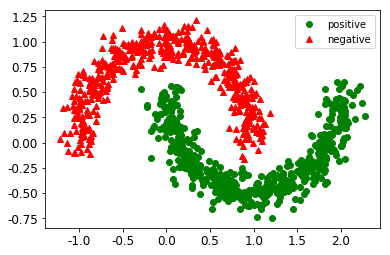

In [75]:
#데이터 시각화
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="negative")
plt.legend()
plt.show()

In [76]:
#편향 추가하기
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]

In [77]:
#데이터 확인
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [78]:
#y_train 열 벡터로 만들기(타깃값 만들기)
y_moons_column_vector = y_moons.reshape(-1, 1)

In [79]:
#data set 나누기
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [80]:
#미니배치 만들기
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [81]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        ,  1.93189866,  0.13158788],
       [ 1.        ,  1.07172763,  0.13482039],
       [ 1.        , -1.01148674, -0.04686381],
       [ 1.        ,  0.02201868,  0.19079139],
       [ 1.        , -0.98941204,  0.02473116]])

In [82]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [83]:
#그래프 초기화
reset_graph()

In [84]:
#입력 특성의 갯수 입력(2차원)
n_inputs = 2

In [85]:
#구성
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X") 
y = tf.placeholder(tf.float32, shape=(None, 1), name="y") #1개의 결과값
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta") #3개의 모수 생성
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)

In [86]:
#로그 손실
loss = tf.losses.log_loss(y, y_proba) #로지스틱 회귀의 비용함수

In [87]:
#경사하강법(모델 훈련)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [88]:
#변수 초기화
init = tf.global_variables_initializer()

In [89]:
#평가
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size) #계속해서 새로운 미니 배치 이용
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch}) #placeholder에 새로운 배치 계속 주입하여 경사하강
        loss_val = loss.eval({X: X_test, y: y_test}) #훈련데이터에 대한 test set에서의 비용
        if epoch % 100 == 0:
            print("에포크:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

에포크: 0 	Loss: 0.79260236
에포크: 100 	Loss: 0.34346345
에포크: 200 	Loss: 0.30754045
에포크: 300 	Loss: 0.29288897
에포크: 400 	Loss: 0.28533578
에포크: 500 	Loss: 0.2804781
에포크: 600 	Loss: 0.2780829
에포크: 700 	Loss: 0.2761544
에포크: 800 	Loss: 0.27551997
에포크: 900 	Loss: 0.27491233


In [90]:
y_proba_val[:5]

array([[0.54895616],
       [0.70724374],
       [0.51900256],
       [0.9911136 ],
       [0.5085905 ]], dtype=float32)

In [92]:
#추정확률이 0.5보다 크면 양성으로 분류
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [93]:
#정밀도와 재현율 계산
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.8627450980392157

In [94]:
recall_score(y_test, y_pred)

0.8888888888888888

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


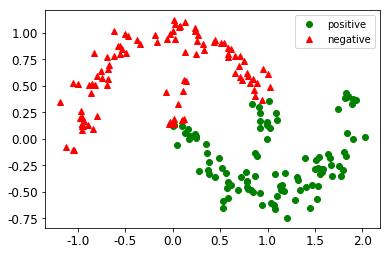

In [96]:
#예측에 대한 그래프
y_pred_idx = y_pred.reshape(-1) # 열 벡터를 1차원 배열로 바꿉니다
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="negative")
plt.legend()
plt.show()
#로지스틱 회귀 모델은 선형적인 결정 경계를 가지므로 최선

In [97]:
#특성 공학을 이용한 특성 추가
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

In [98]:
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

In [99]:
#그래프 초기화
reset_graph()

In [100]:
#logistic regresssion 정의
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [101]:
#for tensorboard
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [102]:
#make graph
n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [103]:
#그래프 평가
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # 체크포인트 파일이 있으면 모델을 복원하고 에포크 횟수를 로드합니다
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("중지되었던 훈련입니다. 에포크를 이어갑니다.", start_epoch)
        saver.restore(sess, checkpoint_path)
    else: #그렇지 않으면 처음부터 다시 시작
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("에포크:", epoch, "\t손실:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

에포크: 0 	손실: 0.629985
에포크: 500 	손실: 0.16122364
에포크: 1000 	손실: 0.1190321
에포크: 1500 	손실: 0.097329214
에포크: 2000 	손실: 0.08369793
에포크: 2500 	손실: 0.074375816
에포크: 3000 	손실: 0.06750215
에포크: 3500 	손실: 0.062206898
에포크: 4000 	손실: 0.058026794
에포크: 4500 	손실: 0.054562975
에포크: 5000 	손실: 0.051708292
에포크: 5500 	손실: 0.049237743
에포크: 6000 	손실: 0.047167286
에포크: 6500 	손실: 0.04537664
에포크: 7000 	손실: 0.043818746
에포크: 7500 	손실: 0.04237422
에포크: 8000 	손실: 0.041089162
에포크: 8500 	손실: 0.039970912
에포크: 9000 	손실: 0.038920246
에포크: 9500 	손실: 0.038010743
에포크: 10000 	손실: 0.037155695


In [104]:
#양성 분류
y_pred = (y_proba_val >= 0.5)

In [105]:
#정확도
precision_score(y_test, y_pred)

0.9797979797979798

In [106]:
#재현율
recall_score(y_test, y_pred)

0.9797979797979798

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


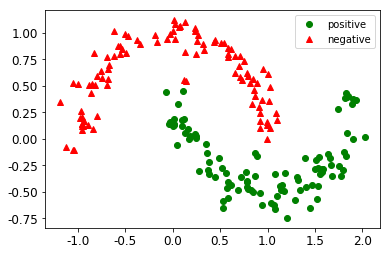

In [108]:
#예측 그래프 표현
y_pred_idx = y_pred.reshape(-1) # 열 벡터 대신 1차원 배열
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="negative")
plt.legend()
plt.show()

In [109]:
#random search를 통한 Cross validation을 통한 batch의 size와 learning rate의 탐색을 시행하는 logistic regression
from scipy.stats import reciprocal

n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=search_iteration)

    n_inputs = 2 + 4
    logdir = log_dir("logreg")
    
    print("반복", search_iteration)
    print("  logdir:", logdir)
    print("  batch_size:", batch_size)
    print("  learning_rate:", learning_rate)
    print("  훈련: ", end="")

    reset_graph()

    X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(
        X, y, learning_rate=learning_rate)

    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))

    final_model_path = "./my_logreg_model_%d" % search_iteration

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  정밀도:", precision_score(y_test, y_pred))
        print("  재현율:", recall_score(y_test, y_pred))

반복 0
  logdir: tf_logs/logreg-run-20180726121617/
  batch_size: 54
  learning_rate: 0.004430375245218265
  훈련: .....................
  정밀도: 0.9797979797979798
  재현율: 0.9797979797979798
반복 1
  logdir: tf_logs/logreg-run-20180726121831/
  batch_size: 22
  learning_rate: 0.0017826497151386947
  훈련: .....................
  정밀도: 0.9797979797979798
  재현율: 0.9797979797979798
반복 2
  logdir: tf_logs/logreg-run-20180726122320/
  batch_size: 74
  learning_rate: 0.00203228544324115
  훈련: .....................
  정밀도: 0.9696969696969697
  재현율: 0.9696969696969697
반복 3
  logdir: tf_logs/logreg-run-20180726122457/
  batch_size: 58
  learning_rate: 0.004491523825137997
  훈련: .....................
  정밀도: 0.9797979797979798
  재현율: 0.9797979797979798
반복 4
  logdir: tf_logs/logreg-run-20180726122658/
  batch_size: 61
  learning_rate: 0.07963234721775589
  훈련: .....................
  정밀도: 0.9801980198019802
  재현율: 1.0
반복 5
  logdir: tf_logs/logreg-run-20180726122853/
  batch_size: 92
  learning_rate: 0.00046